## IMPORT LIBRARIES

In [387]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

## LOADING DATA

In [153]:
train_dir=r'E:/EQUATION_SOLVER/extracted_images'

train_datagen=ImageDataGenerator(rescale=1./255,
                                 rotation_range=30,
                                 shear_range=0.3,
                                 zoom_range=0.3,
                                 width_shift_range=0.4,
                                 height_shift_range=0.4,
                                 horizontal_flip=True,
                                 fill_mode='nearest')

## PREPROCESSING THE IMAGE DATA

In [388]:
img_rows=28
img_cols=28
batch_size=32
train_generator=train_datagen.flow_from_directory(train_dir,
                                                  color_mode='grayscale',
                                                  target_size=(img_rows,img_cols),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

Found 153366 images belonging to 12 classes.


## CREATING MODEL

In [155]:
from tensorflow.keras.optimizers import RMSprop
model = Sequential()
model.add(Conv2D(30, (5, 5), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(12, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [156]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 375)              

## TRAINING THE MODEL

In [329]:
history = model.fit(train_generator,steps_per_epoch=39061//32,epochs=40,verbose=1)

Epoch 1/40
1220/1220 [==============================] - 56s 46ms/step - loss: 1.4705 - acc: 0.4959
Epoch 2/40
1220/1220 [==============================] - 55s 45ms/step - loss: 1.4686 - acc: 0.4929
Epoch 3/40
1220/1220 [==============================] - 56s 45ms/step - loss: 1.4646 - acc: 0.5000 2s 
Epoch 4/40
1220/1220 [==============================] - 56s 46ms/step - loss: 1.4706 - acc: 0.4946
Epoch 5/40
1220/1220 [==============================] - 55s 45ms/step - loss: 1.4614 - acc: 0.5007
Epoch 6/40
1220/1220 [==============================] - 55s 45ms/step - loss: 1.4628 - acc: 0.4999
Epoch 7/40
1220/1220 [==============================] - 56s 46ms/step - loss: 1.4574 - acc: 0.4999
Epoch 8/40
1220/1220 [==============================] - 57s 47ms/step - loss: 1.4650 - acc: 0.4972
Epoch 9/40
1220/1220 [==============================] - 55s 45ms/step - loss: 1.4600 - acc: 0.4947
Epoch 10/40
1220/1220 [==============================] - 55s 45ms/step - loss: 1.4584 - acc: 0.4977
Epoch

## SAVING AND LOADING THE MODEL

In [389]:
from tensorflow.keras.models import save_model,load_model

save_model(model,'E:/LETS_GROW_MORE_TASKS/Equation_Solver.h5')

model=load_model('E:/LETS_GROW_MORE_TASKS/Equation_Solver.h5')

In [390]:
import cv2

import numpy as np

import matplotlib.pyplot as plt

## EVALUATING PERFORMANCE OF MODEL

In [394]:
img=cv2.imread('E:/LETS_GROW_MORE_TASKS/f-11.jpg')

img_copy=img.copy()

gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)    

thresh,binary=cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

cv2.floodFill(binary,None,(0,0),0)

(909397,
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 None,
 (0, 0, 1131, 811))

 ## DRAWING CONTOURS AND DETECTING TEXT

In [395]:
f=[]
contours,hierarchy=cv2.findContours(binary,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

for _, c in enumerate(contours):

    # Get the bounding rectangle of the current contour:
    boundRect = cv2.boundingRect(c)

    # Get the bounding rectangle data:
    rectX = boundRect[0]
    rectY = boundRect[1]
    rectWidth = boundRect[2]
    rectHeight = boundRect[3]

    # Estimate the bounding rect area:
    rectArea = rectWidth * rectHeight

    # Set a min area threshold
    minArea = 10

    # Filter blobs by area:
    if rectArea > minArea:

        # Draw bounding box:
        color = (0, 255, 0)
        cv2.rectangle(img_copy, (int(rectX), int(rectY)),
                      (int(rectX + rectWidth), int(rectY + rectHeight)), color, 2)
        cv2.imshow("Bounding Boxes", img_copy)
        # Crop bounding box:
        currentCrop = img[rectY:rectY+rectHeight,rectX:rectX+rectWidth]
        f.append(currentCrop)
        cv2.imshow("Current Crop", currentCrop)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

In [396]:
classes=['-','+','0','1','2','3','4','5','6','7','8','9']

In [397]:
cv2.imshow('',f[2])

cv2.waitKey(0)

cv2.destroyAllWindows()

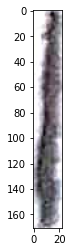

In [398]:
plt.imshow(f[2])


plt.show()

In [399]:
final=[]
for i in range(0,2):
    f[i]=cv2.resize(f[i],(28,28))
    f[i]=cv2.cvtColor(f[i],cv2.COLOR_BGR2GRAY)
    f[i]=np.expand_dims(f[i],2)
    final.append(classes[np.argmax(model.predict(np.expand_dims(f[i],axis=0)))])
print('Final Result : {}'.format(int(final[0])+int(final[1])))
    
    
    

Final Result : 2
